In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urlencode
import csv

In [ ]:
url_list = ['https://www.amazon.in/Zebronics-Bluetooth-Earbuds-Playtime-Assistant/product-reviews/B09Z8CC6DB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
            'https://www.amazon.in/Zebronics-Bluetooth-Earbuds-Playtime-Assistant/product-reviews/B09Z8CC6DB/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2',
            'https://www.amazon.in/Zebronics-Bluetooth-Earbuds-Playtime-Assistant/product-reviews/B09Z8CC6DB/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=3',
            'https://www.amazon.in/Zebronics-Bluetooth-Earbuds-Playtime-Assistant/product-reviews/B09Z8CC6DB/ref=cm_cr_getr_d_paging_btm_next_4?ie=UTF8&reviewerType=all_reviews&pageNumber=4',
            'https://www.amazon.in/Zebronics-Bluetooth-Earbuds-Playtime-Assistant/product-reviews/B09Z8CC6DB/ref=cm_cr_getr_d_paging_btm_next_5?ie=UTF8&reviewerType=all_reviews&pageNumber=5',
            'https://www.amazon.in/Zebronics-Bluetooth-Earbuds-Playtime-Assistant/product-reviews/B09Z8CC6DB/ref=cm_cr_getr_d_paging_btm_next_6?ie=UTF8&reviewerType=all_reviews&pageNumber=6',
            'https://www.amazon.in/Zebronics-Bluetooth-Earbuds-Playtime-Assistant/product-reviews/B09Z8CC6DB/ref=cm_cr_getr_d_paging_btm_next_7?ie=UTF8&reviewerType=all_reviews&pageNumber=7',
            'https://www.amazon.in/Zebronics-Bluetooth-Earbuds-Playtime-Assistant/product-reviews/B09Z8CC6DB/ref=cm_cr_arp_d_paging_btm_next_8?ie=UTF8&reviewerType=all_reviews&pageNumber=8']

In [ ]:
#user = []
#ratings = []
review_title = []
reviews = []
data_string = ""

for url in url_list: 
    params = {'api_key': "c04cecf74b0363e7148a84dc21c28144", 'url': url}
    response = requests.get('http://api.scraperapi.com/',   params=urlencode(params))
    soup = BeautifulSoup(response.text, 'html.parser')

    '''for item in soup.find_all("span", class_='a-profile-name'):
      data_string = data_string + item.get_text()
      user.append(data_string)
      data_string = ""  

    for item in soup.find_all('i',class_='review-rating'):
      data_string = data_string + item.get_text()
      ratings.append(data_string)
      data_string = ""  '''
    for item in soup.find_all("a", class_='review-title'):
      data_string = data_string + item.get_text()
      review_title.append(data_string)
      review_title[:]=[words.lstrip("\n") for words in review_title]
      review_title[:]=[words.rstrip("\n") for words in review_title]
      data_string = ""

    for item in soup.find_all("span", {"data-hook": "review-body"}):
      data_string = data_string + item.get_text()
      reviews.append(data_string)
      reviews[:]=[words.lstrip("\n") for words in reviews]
      reviews[:]=[words.rstrip("\n") for words in reviews]
      data_string = ""

In [ ]:
review = {'Title':review_title,'Content':reviews}

In [ ]:
df = pd.DataFrame.from_dict(review, orient='index')
df.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
Title,"Great Bass, Good Sound. Loose Hinge on Case an...",Size is not comfortable.,Very nice,"Great experience, info about the product is ba...",Poor call quality,Good sound,Average product,Not Satisfied by Amazon,Sound,"No cover to peel, as mentioned in the product ...",...,Worsted product I have ever seen,Best quality product in price range 👍 osm zebr...,Enc is very bad,Sounds one buds low,Not comfortable inside the ear,Receiving call not OK,Case was damaged,Really good earbuds.,Good product,Good TWS earphone
Content,The media could not be loa...,Under prices this is satisfied.,,As per my experience of using it for more than...,Call quality is poor . Ok for listening music ...,Very nice sound. mor bess❤️. Comfortable produ...,I'm writing review after 2 months usuage. Soun...,"Product is used previously, they sent it to me...",Sound quality not good,There was no protective cover to peel before c...,...,The media could not be loa...,Best product in price range 👌,I purchased as know brand Zebronics is very go...,One buds not sound,Not comfortable,The media could not be loa...,The earbuds are goodBut the case is damaged an...,i'am using this earbuds on last 1 month. Reall...,Good product and battery life is so good and s...,For the past few years I tried various brands....


In [ ]:
df.dropna(axis=1, inplace=True)

In [ ]:
review_data = df.T
review_data

,Title,Content
0,"Great Bass, Good Sound. Loose Hinge on Case an...",The media could not be loa...
1,Size is not comfortable.,Under prices this is satisfied.
2,Very nice,
3,"Great experience, info about the product is ba...",As per my experience of using it for more than...
4,Poor call quality,Call quality is poor . Ok for listening music ...
...,...,...
75,Receiving call not OK,The media could not be loa...
76,Case was damaged,The earbuds are goodBut the case is damaged an...
77,Really good earbuds.,i'am using this earbuds on last 1 month. Reall...
78,Good product,Good product and battery life is so good and s...


In [ ]:
import numpy as np
from textblob import TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity
review_data['sentiment'] = review_data['Title'].apply(get_sentiment)
review_data.head()

,Title,Content,sentiment
0,"Great Bass, Good Sound. Loose Hinge on Case an...",The media could not be loa...,0.266026
1,Size is not comfortable.,Under prices this is satisfied.,-0.200000
2,Very nice,,0.780000
3,"Great experience, info about the product is ba...",As per my experience of using it for more than...,0.600000
4,Poor call quality,Call quality is poor . Ok for listening music ...,-0.400000


In [ ]:
review_data

,Title,Content,sentiment
0,"Great Bass, Good Sound. Loose Hinge on Case an...",The media could not be loa...,0.266026
1,Size is not comfortable.,Under prices this is satisfied.,-0.200000
2,Very nice,,0.780000
3,"Great experience, info about the product is ba...",As per my experience of using it for more than...,0.600000
4,Poor call quality,Call quality is poor . Ok for listening music ...,-0.400000
...,...,...,...
75,Receiving call not OK,The media could not be loa...,-0.250000
76,Case was damaged,The earbuds are goodBut the case is damaged an...,0.000000
77,Really good earbuds.,i'am using this earbuds on last 1 month. Reall...,0.700000
78,Good product,Good product and battery life is so good and s...,0.700000


Pre Processing

In [ ]:
sample_review = review_data['Content'].iloc[40]
sample_review

''

In [ ]:
import html

decoded_review = html.unescape(sample_review)
decoded_review

''

In [ ]:
review_data.head(3)

,Title,Content,sentiment
0,"Great Bass, Good Sound. Loose Hinge on Case an...",The media could not be loa...,0.266026
1,Size is not comfortable.,Under prices this is satisfied.,-0.200000
2,Very nice,,0.780000


In [ ]:
import re
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
review_data['content_clean'] = review_data['Content'].apply(clean_text)
review_data.head()

,Title,Content,sentiment,content_clean
0,"Great Bass, Good Sound. Loose Hinge on Case an...",The media could not be loa...,0.266026,the media could not be loa...
1,Size is not comfortable.,Under prices this is satisfied.,-0.200000,under prices this is satisfied
2,Very nice,,0.780000,
3,"Great experience, info about the product is ba...",As per my experience of using it for more than...,0.600000,as per my experience of using it for more than...
4,Poor call quality,Call quality is poor . Ok for listening music ...,-0.400000,call quality is poor ok for listening music a...


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
review_data['content_clean'] = review_data['content_clean'].apply(remove_stopwords)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(review_data['Title'])

review_data['target_encoded'] = le.transform(review_data['Title'])
review_data.head()

,Title,Content,sentiment,content_clean,target_encoded
0,"Great Bass, Good Sound. Loose Hinge on Case an...",The media could not be loa...,0.266026,media could loaded ...,32
1,Size is not comfortable.,Under prices this is satisfied.,-0.200000,prices satisfied,55
2,Very nice,,0.780000,,66
3,"Great experience, info about the product is ba...",As per my experience of using it for more than...,0.600000,per experience using months say actually good...,33
4,Poor call quality,Call quality is poor . Ok for listening music ...,-0.400000,call quality poor ok listening music watching...,49


In [ ]:
x = review_data['Title']
y = review_data['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=20)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

60 60
20 20


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import numpy as np
vectorizer = TfidfVectorizer()

# Convert the text column into a TF-IDF matrix
X = vectorizer.fit_transform(x_train)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y_train)

LinearRegression()

In [ ]:
X_test_tfidf = vectorizer.transform(x_test)
y_pred = model.predict(X_test_tfidf)

In [ ]:
print('Predicted ratings:', y_pred)
print('Actual ratings:', y_test.tolist())

Predicted ratings: [ 0.70000001  0.45973281  0.70482465  0.55000001  0.220481    0.62006154
  0.41174059  0.79883761  0.220481    0.56083696  0.50236888  0.25222241
  0.69999999 -0.23526163  0.30575174  0.02766331  0.64354303  0.4486186
  0.32287576 -0.00817048]
Actual ratings: [0.7, 0.0, 1.0, 0.55, 0.4166666666666667, 0.7, 0.266025641025641, 1.0, 0.0, 0.55, 0.425, 0.3333333333333333, 0.7, 0.0, 0.6, 0.78, 0.0, 0.0, 0.4, 0.13333333333333341]


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

R-squared score: 0.13475157837961338


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128267 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2951 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3009 missing from current font.
  font.set_

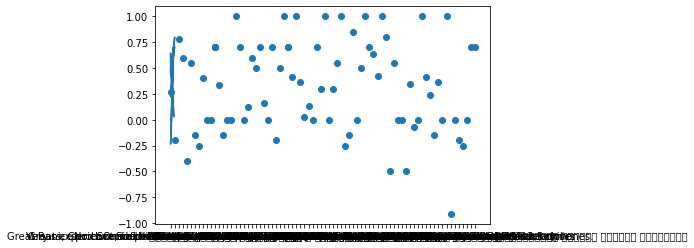

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(review_data["Title"],review_data["sentiment"])
plt.plot(y_test,y_pred)

In [ ]:
cmt = confusion_matrix(y_pred,y_test)

ValueError: ignored

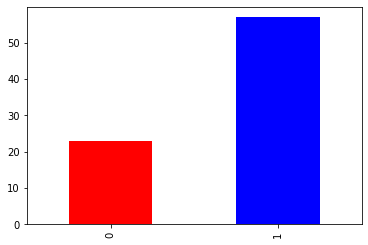

In [ ]:
import matplotlib.pyplot as plt
review_data['sentiment'].value_counts().sort_index().plot.bar(color=['red', 'blue'])

In [ ]:
from nltk.tokenize import WhitespaceTokenizer as wst
from nltk.stem import WordNetLemmatizer as wnl

In [ ]:
w_tokenizer = wst()
lemmatizer = wnl()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
review_data['text_lemmatized'] = review_data['content_clean'].apply(lemmatize_text)

In [ ]:
review_data.head(3)

,Ratings,Title,Content,content_clean,text_lemmatized
0,4.0 out of 5 stars,Size is not comfortable.,Under prices this is satisfied.,prices satisfied,"[price, satisfied]"
1,3.0 out of 5 stars,Very nice,,,[]
2,4.0 out of 5 stars,"Great Bass, Good Sound. Loose Hinge on Case an...",The media could not be loa...,media could loaded ...,"[medium, could, loaded, design, look, ok, room..."


In [ ]:
review_data.head()

,Ratings,Title,Content,sentiment,content_clean,target_encoded,text_lemmatized
0,4,Size is not comfortable.,Under prices this is satisfied.,1,prices satisfied,53,"[price, satisfied]"
1,3,Very nice,,0,,65,[]
2,4,"Great Bass, Good Sound. Loose Hinge on Case an...",The media could not be loa...,1,media could loaded ...,31,"[medium, could, loaded, design, look, ok, room..."
3,4,"Great experience, info about the product is ba...",As per my experience of using it for more than...,1,per experience using months say actually good...,32,"[per, experience, using, month, say, actually,..."
4,4,Good sound,Very nice sound. mor bess❤️. Comfortable produ...,1,nice sound mor bess❤️ comfortable product ligh...,27,"[nice, sound, mor, bess❤️, comfortable, produc..."


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.69      0.81        16

    accuracy                           0.69        16
   macro avg       0.50      0.34      0.41        16
weighted avg       1.00      0.69      0.81        16



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


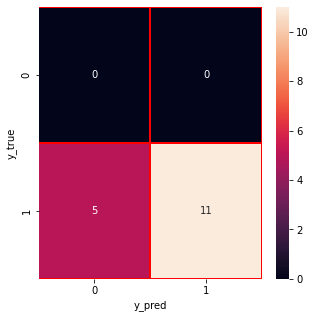

In [ ]:
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmt,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()